In [1]:
import numpy as np
from matplotlib import pyplot as plt

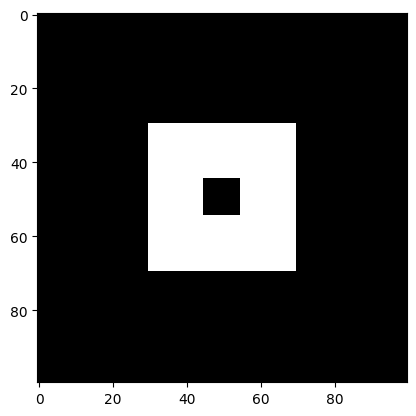

In [5]:
image = np.zeros((100, 100), dtype = np.uint8)
image[30:70, 30: 70] = 255
image[45:55, 45:55] = 0
plt.imshow(image, cmap="gray")

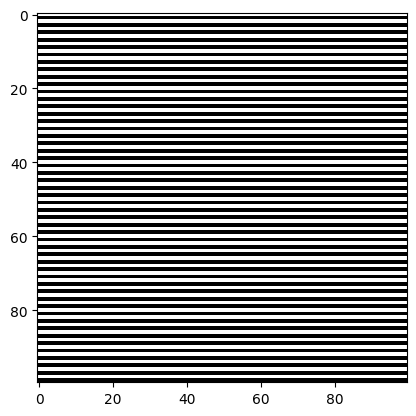

In [17]:
image_lines = np.zeros((100, 100), dtype = np.uint8)
for i in range(0, image_lines.shape[0], 2):
    image_lines[i, :] = 255
plt.imshow(image_lines, cmap="gray")

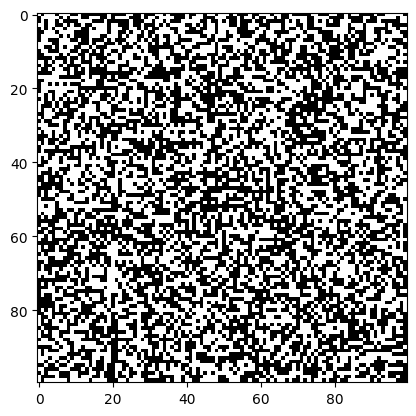

In [21]:
img_random = np.random.randint(2, size=(100,100)).astype(bool)
plt.imshow(img_random, cmap="gray")

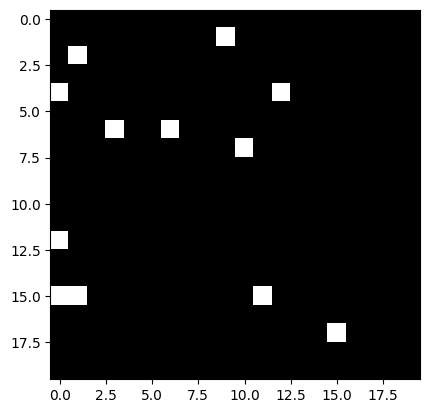

In [34]:
n = np.random.normal(0, 1, size=(20, 20))
s = (n - n.min()) / (n.max() - n.min())
random_img2 = (255 * s).astype(np.uint8)
random_img2 = np.where(random_img2 > 220, 255, 0)
plt.imshow(random_img2, cmap="gray")

In [40]:
def dilation(img, kernel):
    kernel_height,kernel_width = kernel.shape
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2
    
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode = 'constant', constant_values = 0)
    output = np.zeros_like(img) # Create zeros matrix with same shape
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded_img[i: i+kernel_height, j: j+kernel_width]
            if np.any(region == 255):
                output[i,j] = 255
    # print(output)
    return output

(20, 20)


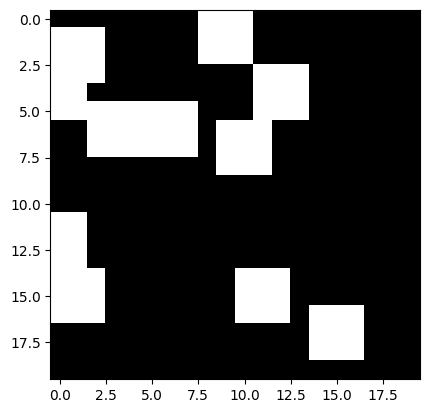

In [41]:
kernel = np.ones((3,3), dtype = np.uint8)
dilated_img = dilation(random_img2, kernel)
plt.imshow(dilated_img, cmap = "gray")
print(dilated_img.shape)

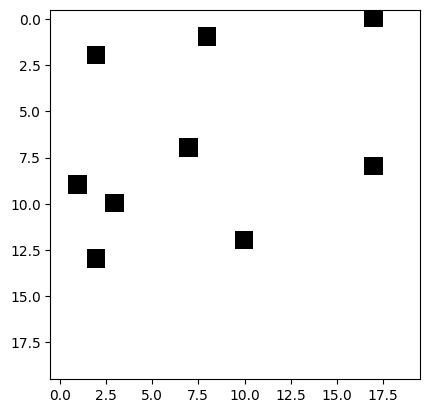

In [72]:
n = np.random.normal(0, 1, size=(20, 20))
s = (n - n.min()) / (n.max() - n.min())
random_img3 = (255 * s).astype(np.uint8)
random_img3 = np.where(random_img3 > 30, 255, 0)
plt.imshow(random_img3, cmap="gray")

In [73]:
def erosion(img, kernel):
    kernel_height,kernel_width = kernel.shape
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2
    
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode = 'constant', constant_values = 255)
    output = np.zeros_like(img) # Create zeros matrix with same shape
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded_img[i: i+kernel_height, j: j+kernel_width]
            if np.all(region == 255):
                output[i,j] = 255
    print(output)
    return output

[[255 255 255 255 255 255 255   0   0   0 255 255 255 255 255 255   0   0
    0 255]
 [255   0   0   0 255 255 255   0   0   0 255 255 255 255 255 255   0   0
    0 255]
 [255   0   0   0 255 255 255   0   0   0 255 255 255 255 255 255 255 255
  255 255]
 [255   0   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [255 255 255 255 255 255   0   0   0 255 255 255 255 255 255 255 255 255
  255 255]
 [255 255 255 255 255 255   0   0   0 255 255 255 255 255 255 255   0   0
    0 255]
 [  0   0   0 255 255 255   0   0   0 255 255 255 255 255 255 255   0   0
    0 255]
 [  0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255   0   0
    0 255]
 [  0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [255 255   0   0   0 255 255 255 255   0   0   0 255 255 255 255

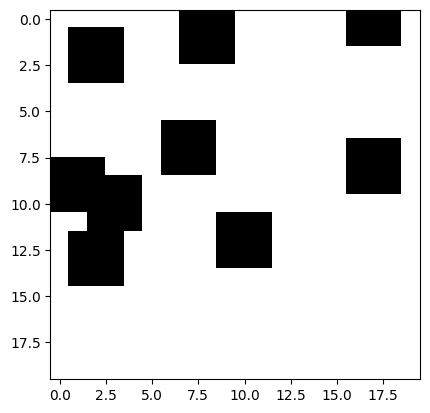

In [74]:
kernel = np.ones((3,3), dtype = np.uint8)
erosion_img = erosion(random_img3, kernel)
plt.imshow(erosion_img, cmap = "gray")
print(erosion_img.shape)

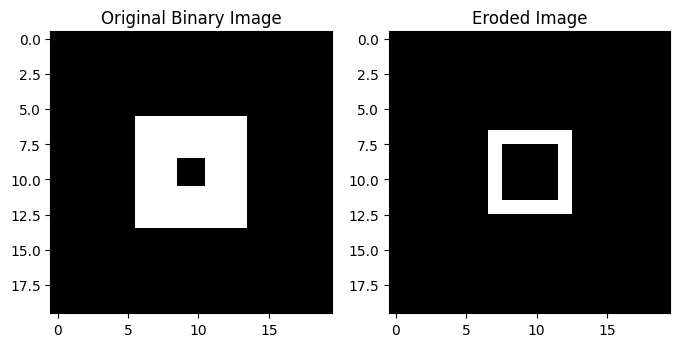

In [77]:
def erode(image, kernel):
    """
    Erosion operation on a binary image.
    Only if all pixels in the neighborhood (defined by kernel) are white (255),
    the corresponding output pixel is set to white.
    """
    kernel_height, kernel_width = kernel.shape
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2
    
    # For erosion, pad with white (255) to avoid boundary issues
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=255)
    output = np.zeros_like(image)
    
    # Slide the kernel over the image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract neighborhood
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            # If all pixels are white, keep white; else, black.
            if np.all(region == 255):
                output[i, j] = 255
    return output


# Test dilation on a sample binary image
binary_image = np.zeros((20, 20), dtype=np.uint8)
binary_image[6:14, 6:14] = 255
binary_image[9:11, 9:11] = 0  # Create a "hole" in the square


# Test erosion on the same binary image
eroded_image = erode(binary_image, kernel)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title("Original Binary Image")
plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title("Eroded Image")
plt.show()